In [2]:
!pip install langgraph

     ---------------------------------------- 0.0/151.2 kB ? eta -:--:--
     ------- ------------------------------- 30.7/151.2 kB 1.3 MB/s eta 0:00:01
     ----------------------- --------------- 92.2/151.2 kB 1.1 MB/s eta 0:00:01
     ------------------------------ ------- 122.9/151.2 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 151.2/151.2 kB 897.5 kB/s eta 0:00:00
  Using cached langgraph_prebuilt-0.1.8-py3-none-any.whl (25 kB)
  Using cached langgraph_checkpoint-2.0.25-py3-none-any.whl (42 kB)
     ---------------------------------------- 0.0/47.6 kB ? eta -:--:--
     ---------------------------------------- 47.6/47.6 kB 1.2 MB/s eta 0:00:00
  Using cached ormsgpack-1.9.1-cp310-cp310-win_amd64.whl (125 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install langchain langchain_groq langchain_community


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
os.environ["LANGCHAIN_API_KEY"]="LANGCHAIN_API_KEY"
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [6]:
from langchain_groq import ChatGroq

In [8]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma-9b-It")
llm

NameError: name 'groq_api_key' is not defined

In [9]:
##Start Building Chat bot using Langgraph

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [13]:
class State(TypedDict):
    #Message have the type "list".The 'add_messages' function
    #in the annotation defines how this state key should be updated
    #(in this case,it appends messages to the list,rather than overwriting them)
    messages:Annotated[list,add_messages] 
graph_builder=StateGraph(State)

In [14]:
graph_builder


In [15]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}


In [16]:
graph_builder.add_node("chatbot",chatbot)

In [17]:
graph_builder

In [19]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

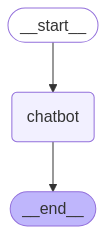

In [20]:
graph_builder.compile()

In [21]:
graph=graph_builder.compile()

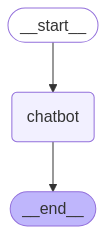

In [23]:
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Good Bye")
        break
    for event in graph.stream({"messages":("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:",value["messages"].content)
    